#**Proyecto Final**
Por: Brianny Hernández

##Ejercicio propuesto de la librería Suprise en Python

In [1]:
# Instalar la libreria
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357254 sha256=5ab190f975a2678a238f4cedcc8b94777be1ef4413d03de2afe351b71ea33311
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [19]:
#Importando las librerias
import pandas as pd
from surprise import KNNBasic, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [20]:
#Ingesta de datos:
reader = Reader(line_format='user item rating timestamp', sep='::')
data = Dataset.load_from_file('ratings.dat', reader=reader)

In [21]:
#Dividir nuestros datos en entrenamiento y prueba
train, test = train_test_split(data, test_size=0.3)

In [22]:
#Definir el algoritmo
knn = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True})
kMeans = KNNWithMeans(k=50, sim_options={'name': 'cosine','user_based': False})

En este caso para entender mejor la aplicación del modelo, busque algunas explicaciones de la definición de este algoritmo.

k=50 indica que se considerarán los 50 vecinos más cercanos para hacer la predicción.
sim_options es un diccionario que contiene las opciones para el cálculo de la similitud:


*   'name': 'pearson' especifica que se utilizará el coeficiente de correlación de Pearson para calcular la similitud entre los usuarios.
*   'user_based': True indica que la similitud se calculará entre usuarios (en lugar de entre ítems).

KNNWithMeans es una variante de KNN que ajusta las predicciones considerando la media de las calificaciones.



*   'name': 'cosine' especifica que se utilizará la similitud del coseno para calcular la similitud entre los ítems.
*   'user_based': False indica que la similitud se calculará entre ítems (en lugar de entre usuarios).



Enlace de la documentación: [link text](https://surprise.readthedocs.io/en/stable/knn_inspired.html)

In [23]:
#Entrenar los modelos
knn.fit(train)
kMeans.fit(train)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [24]:
#Probar
user_id = '42'
item_id = '7'
knn_user_prediction = knn.predict(user_id, item_id)
kMeans_user_prediction = kMeans.predict(user_id, item_id)

user_exists = train.knows_user(train.to_inner_uid(user_id))
item_exists = train.knows_item(train.to_inner_iid(item_id))

print(knn_user_prediction[0])
print(kMeans_user_prediction[0])

42
42


En esta parte me estaba pasando lo mismo que a un compañero que logre ver en el foro, pero aun con las comillas el resultado de las predicciones era igual.

In [26]:
# Probar
user_id = '42'
item_id = '7'

# Verificar existencia de usuario e ítem
user_exists = train.knows_user(train.to_inner_uid(user_id))
item_exists = train.knows_item(train.to_inner_iid(item_id))

if user_exists and item_exists:
    knn_user_prediction = knn.predict(user_id, item_id)
    kMeans_user_prediction = kMeans.predict(user_id, item_id)

    print(f'KNN Prediction: {knn_user_prediction.est}')
    print(f'KMeans Prediction: {kMeans_user_prediction.est}')
else:
    print('El usuario o el ítem no existen en el conjunto de entrenamiento')

KNN Prediction: 3.366820591931518
KMeans Prediction: 3.444972969506583


**Interpretación de resultados**

**KNN Prediction: 3.366820591931518**

Este valor es la calificación estimada que el modelo KNNBasic predice que el usuario 42 daría al ítem 7, este utiliza el método K-Nearest Neighbors (KNN) con la similitud de Pearson entre usuarios, lo que significa que la predicción se basa en las calificaciones de los 50 usuarios más similares a 42, ponderadas por la similitud de Pearson.

**KMeans Prediction: 3.444972969506583**

Este modelo también utiliza el método K-Nearest Neighbors, pero en este caso la similitud se calcula entre ítems utilizando la similitud del coseno, y ajusta las predicciones considerando la media de las calificaciones de los ítems más similares.


Ambas predicciones están en un rango similar, lo que sugiere que ambos modelos coinciden en que el usuario 42 probablemente calificaría el ítem 7 con una puntuación ligeramente superior a 3. La diferencia entre las dos predicciones es pequeña, lo que indica que ambos métodos, a pesar de utilizar diferentes enfoques para calcular la similitud (usuarios vs. ítems y Pearson vs. coseno), llegan a conclusiones similares sobre la preferencia del usuario.


In [9]:
#Evaluar el modelo
knn_test_predictions = knn.test(test)
kMeans_test_predictions = kMeans.test(test)
knn_rmse = accuracy.rmse(knn_test_predictions)
kMeans_rmse = accuracy.rmse(kMeans_test_predictions)

RMSE: 0.9635
RMSE: 0.8964


In [18]:
print("KNN RMSE:" + str(knn_rmse))
print("KMeans RMSE:" + str(kMeans_rmse))

KNN RMSE:0.9635074201847871
KMeans RMSE:0.8964208150651419


**Interpretación de RMSE**

KNN RMSE: 0.9635074201847871

Este valor de RMSE indica el error promedio cuadrático medio entre las calificaciones reales y las calificaciones predichas por el modelo KNNBasic.Sugiere que, en promedio, las predicciones del modelo KNNBasic se desvían de las calificaciones reales en aproximadamente 0.96 puntos en una escala de calificación.

El modelo KNNWithMeans tiene un RMSE más bajo (0.90) en comparación con el modelo KNNBasic (0.96), lo que indica que KNNWithMeans hace predicciones ligeramente más precisas en este caso. Aunque ambos modelos tienen un desempeño razonablemente bueno, KNNWithMeans se desempeña mejor en términos de error promedio cuadrático medio.

Un RMSE cercano a 0 indica un modelo muy preciso, mientras que valores más altos indican mayor desviación entre las predicciones y las calificaciones reales.

In [27]:
#Para graficas

# Extraer calificaciones reales y predichas
knn_real = [pred.r_ui for pred in knn_test_predictions]
knn_pred = [pred.est for pred in knn_test_predictions]
kMeans_real = [pred.r_ui for pred in kMeans_test_predictions]
kMeans_pred = [pred.est for pred in kMeans_test_predictions]

# Calcular errores de predicción
knn_errors = [real - pred for real, pred in zip(knn_real, knn_pred)]
kMeans_errors = [real - pred for real, pred in zip(kMeans_real, kMeans_pred)]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

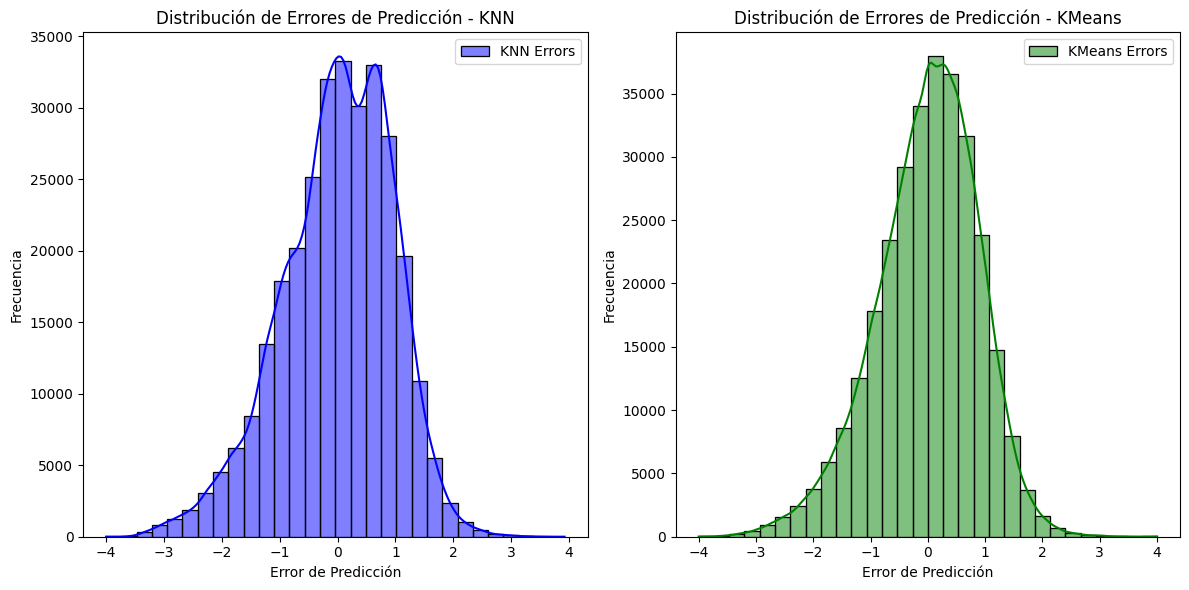

In [29]:
# Histograma de errores de predicción
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(knn_errors, bins=30, kde=True, color='blue', label='KNN Errors')
plt.title('Distribución de Errores de Predicción - KNN')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(kMeans_errors, bins=30, kde=True, color='green', label='KMeans Errors')
plt.title('Distribución de Errores de Predicción - KMeans')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

Esta grafica muestra la distribución de los errores de predicción. Una distribución centrada alrededor de 0 con poca dispersión indica un buen desempeño del modelo, como la que podemos ver con el modelo KMeans.

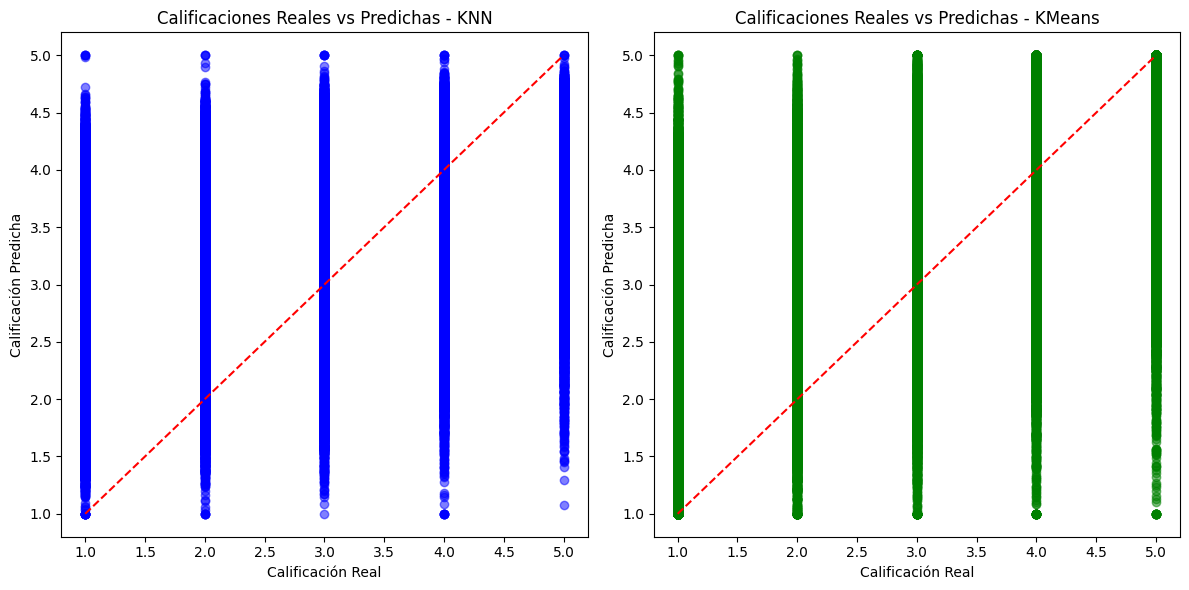

In [30]:
# Scatter plot de calificaciones reales vs predichas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(knn_real, knn_pred, alpha=0.5, color='blue')
plt.plot([min(knn_real), max(knn_real)], [min(knn_real), max(knn_real)], color='red', linestyle='--')
plt.title('Calificaciones Reales vs Predichas - KNN')
plt.xlabel('Calificación Real')
plt.ylabel('Calificación Predicha')

plt.subplot(1, 2, 2)
plt.scatter(kMeans_real, kMeans_pred, alpha=0.5, color='green')
plt.plot([min(kMeans_real), max(kMeans_real)], [min(kMeans_real), max(kMeans_real)], color='red', linestyle='--')
plt.title('Calificaciones Reales vs Predichas - KMeans')
plt.xlabel('Calificación Real')
plt.ylabel('Calificación Predicha')

plt.tight_layout()
plt.show()

Con este scatter plot podemos visualizar la relación entre las calificaciones reales y las predichas. Los puntos cercanos a la línea diagonal indican buenas predicciones.

## **Actividad opcional**

 Implementar la librería en el proyecto que hemos estado desarrollando a lo largo del módulo

In [31]:
ratings = pd.read_csv("ratings.csv")

# Convertir el DataFrame a un objeto Dataset de surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [32]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Usar el algoritmo SVD para entrenar el modelo
algo = SVD()

# Evaluar el algoritmo con 5-fold cross-validation y printar los resultados
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8697  0.8750  0.8730  0.8773  0.8700  0.8730  0.0029  
MAE (testset)     0.6699  0.6736  0.6707  0.6733  0.6684  0.6712  0.0020  
Fit time          1.77    1.79    1.77    2.42    1.92    1.93    0.25    
Test time         0.13    1.01    0.12    0.21    0.13    0.32    0.35    


{'test_rmse': array([0.86970519, 0.87504918, 0.87295253, 0.8773224 , 0.86998215]),
 'test_mae': array([0.66992536, 0.67362474, 0.67067209, 0.67333809, 0.66838112]),
 'fit_time': (1.7687764167785645,
  1.7887423038482666,
  1.7699756622314453,
  2.422029495239258,
  1.921614646911621),
 'test_time': (0.12519145011901855,
  1.0114727020263672,
  0.11524033546447754,
  0.2111341953277588,
  0.13166451454162598)}

<ipython-input-37-2dc30ca501f0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=folds, y=rmse_values, palette='Blues')
<ipython-input-37-2dc30ca501f0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=folds, y=mae_values, palette='Greens')


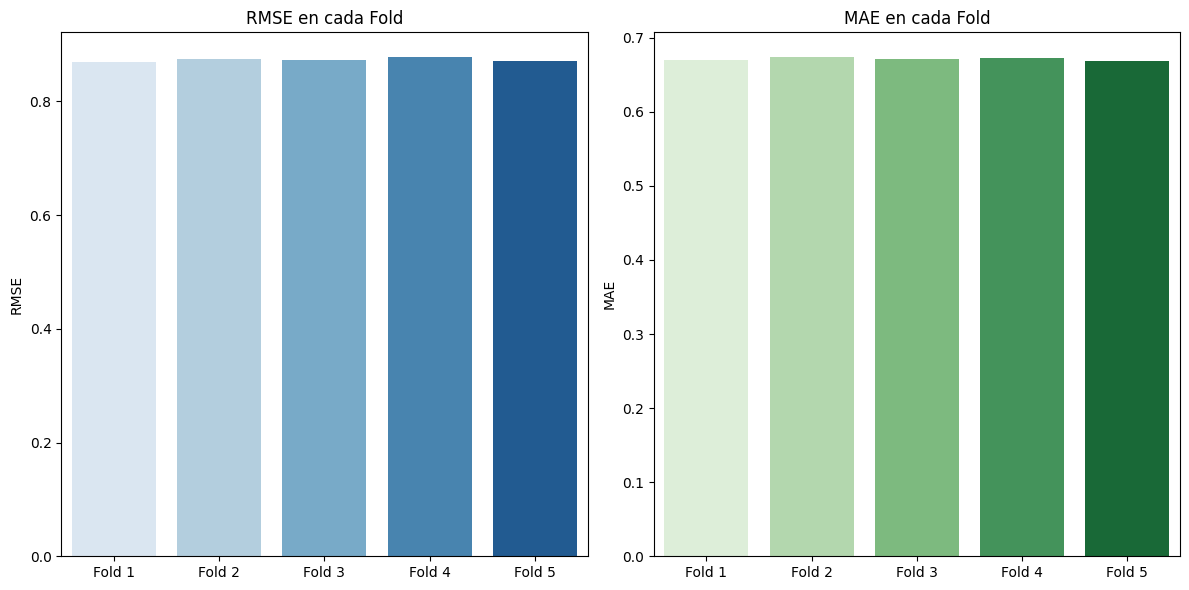

In [37]:
# Datos para las gráficas
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
rmse_values = [0.8697, 0.8750, 0.8730, 0.8773, 0.8700]
mae_values = [0.6699, 0.6736, 0.6707, 0.6733, 0.6684]
fit_times = [1.77, 1.79, 1.77, 2.42, 1.92]
test_times = [0.13, 1.01, 0.12, 0.21, 0.13]

# Gráfica de RMSE y MAE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=folds, y=rmse_values, palette='Blues')
plt.title('RMSE en cada Fold')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=folds, y=mae_values, palette='Greens')
plt.title('MAE en cada Fold')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

**Interpretacion de resultados**

RMSE (Root Mean Squared Error): Es una métrica que mide la diferencia entre los valores predichos por el modelo y los valores reales de calificación. En este caso, los valores de RMSE son bastante consistentes a través de los diferentes folds, con una media de 0.8730 y una desviación estándar muy baja (0.0029), lo que sugiere que el modelo es estable y tiene un buen rendimiento en términos de precisión de predicción.

MAE (Mean Absolute Error): Es otra métrica de error que mide la media de las diferencias absolutas entre las predicciones y las calificaciones reales. Similar a RMSE, un valor más bajo de MAE indica un mejor rendimiento. Aquí, la media de MAE es 0.6712 con una desviación estándar de 0.0020, lo que también muestra que el modelo tiene una buena precisión.

In [33]:
# Entrenar el modelo en el conjunto completo de datos
trainset = data.build_full_trainset()
algo.fit(trainset)

In [34]:
# Generar recomendaciones para un usuario específico
user_id = 2
movie_ids = ratings['movieId'].unique()
predictions = [algo.predict(user_id, iid) for iid in movie_ids]

In [35]:
# Filtrar y ordenar las predicciones
top_n = 10
top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

In [36]:
# Mostrar las recomendaciones
recommended_movies = [(pred.iid, pred.est) for pred in top_predictions]
recommended_movies_df = pd.DataFrame(recommended_movies, columns=['movieId', 'predicted_rating'])
print(recommended_movies_df)

   movieId  predicted_rating
0       50          4.624755
1      296          4.559749
2      858          4.472077
3     1213          4.463070
4     1221          4.446763
5      904          4.430000
6     2019          4.429525
7     1267          4.429386
8     1204          4.424213
9    44555          4.415538
